In [1]:
from sklearn.datasets import make_circles

n_samples=1000

x,y=make_circles(n_samples,
                noise=.03,
                random_state=42)

In [2]:
# features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd

circle=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],'label':y})
circle

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


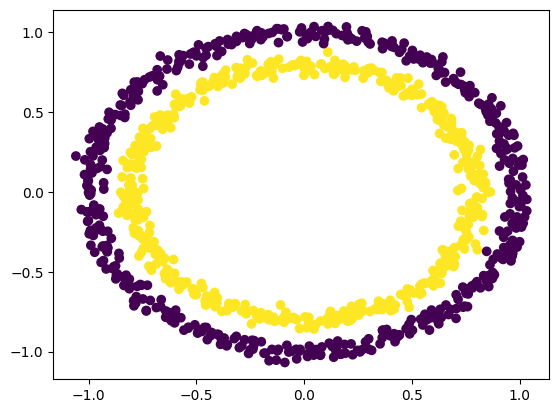

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
x.shape,y.shape

((1000, 2), (1000,))

In [7]:
len(x),len(y)

(1000, 1000)

In [8]:
# model
import tensorflow as tf

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 31ms/step - loss: 7.4737 - accuracy: 0.4970
Epoch 2/5
32/32 [==============================] - 1s 17ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


In [9]:
model_1.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [10]:
# again model

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(x,y,epochs=100,verbose=0)

In [11]:
model_2.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 1.0000


[0.11770562827587128, 1.0]

In [12]:
import numpy as np

def plot_decision_boundary(model,x,y):
    '''
    Plots the decision boundary created by a model predicting on x
    '''
    # define the axis boundary and creat meshgrid
    
    x_min,x_max=x[:,0].min()-.1,x[:,0].max()+.1
    y_min,y_max=x[:,1].min()-.1,x[:,1].max()+.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                     np.linspace(y_min,y_max,100))
    
    x_in=np.c_[xx.ravel(),yy.ravel()]
    
    y_pred=model.predict(x_in)
    
    # checking for multiclass
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred=np.round(y_pred).reshape(xx.shape)
        
    # plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


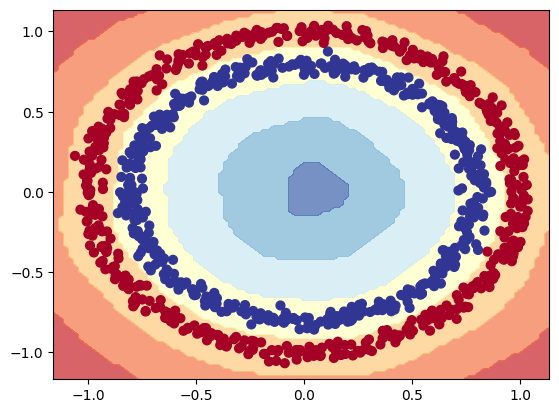

In [13]:
plot_decision_boundary(model_2,x,y)

313/313 [==============================] - 1s 2ms/step
doing binary classification


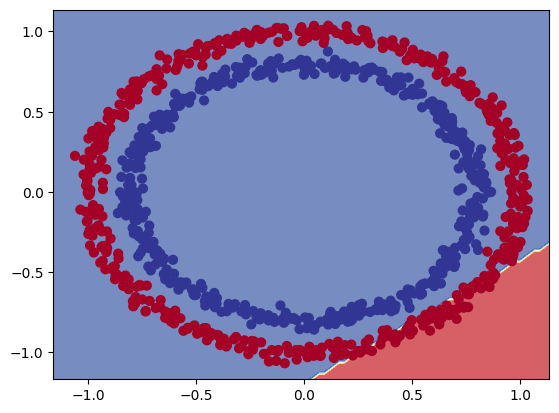

In [14]:
plot_decision_boundary(model_1,x,y)

In [15]:
# checking for regresssion
tf.random.set_seed(42)

# creating regesssion data
x_regression=tf.range(0,1000,5)
y_regression=x_regression+100


In [16]:
x_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [17]:
# spliting the data
x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# fit the model
#model_2.fit(x_reg_train,y_reg_train,epochs=100)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation='relu',input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model_3.fit(x_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 7ms/step - loss: 425.9421 - mae: 425.9421
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 411.8055 - mae: 411.8055
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 398.3099 - mae: 398.3099
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 384.5973 - mae: 384.5973
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 370.7769 - mae: 370.7769
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 356.4195 - mae: 356.4195
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 342.1729 - mae: 342.1729
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 327.9857 - mae: 327.9857
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 313.9208 - mae: 313.9208
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 299.1522 - mae: 299.1522
Epoch 11/100
5/5 [=====================

5/5 [==============================] - 0s 4ms/step - loss: 40.8590 - mae: 40.8590
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 40.8384 - mae: 40.8384
Epoch 88/100
5/5 [==============================] - 0s 4ms/step - loss: 40.7971 - mae: 40.7971
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 40.8580 - mae: 40.8580
Epoch 90/100
5/5 [==============================] - 0s 5ms/step - loss: 40.8243 - mae: 40.8243
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 40.8172 - mae: 40.8172
Epoch 92/100
5/5 [==============================] - 0s 4ms/step - loss: 40.8018 - mae: 40.8018
Epoch 93/100
5/5 [==============================] - 0s 5ms/step - loss: 40.8300 - mae: 40.8300
Epoch 94/100
5/5 [==============================] - 0s 4ms/step - loss: 40.7602 - mae: 40.7602
Epoch 95/100
5/5 [==============================] - 0s 4ms/step - loss: 40.7464 - mae: 40.7464
Epoch 96/100
5/5 [==============================] - 0s 4ms/step

In [18]:
model_3.evaluate(x_reg_test,y_reg_test)

2/2 [==============================] - 0s 0s/step - loss: 63.0880 - mae: 63.0880


[63.087955474853516, 63.087955474853516]

In [19]:
y_reg_pred=model_3.predict(x_reg_test)
y_reg_pred

2/2 [==============================] - 0s 17ms/step


array([[ 890.5019 ],
       [ 896.4238 ],
       [ 902.3457 ],
       [ 908.26764],
       [ 914.1895 ],
       [ 920.1114 ],
       [ 926.0332 ],
       [ 931.9551 ],
       [ 937.87695],
       [ 943.7988 ],
       [ 949.7207 ],
       [ 955.64264],
       [ 961.56445],
       [ 967.4863 ],
       [ 973.4083 ],
       [ 979.33014],
       [ 985.252  ],
       [ 991.1739 ],
       [ 997.09576],
       [1003.01764],
       [1008.93945],
       [1014.86145],
       [1020.7833 ],
       [1026.7051 ],
       [1032.6271 ],
       [1038.5488 ],
       [1044.4707 ],
       [1050.3927 ],
       [1056.3146 ],
       [1062.2363 ],
       [1068.1582 ],
       [1074.0802 ],
       [1080.002  ],
       [1085.924  ],
       [1091.8458 ],
       [1097.7677 ],
       [1103.6896 ],
       [1109.6115 ],
       [1115.5333 ],
       [1121.4552 ],
       [1127.377  ],
       [1133.299  ],
       [1139.2208 ],
       [1145.1427 ],
       [1151.0646 ],
       [1156.9863 ],
       [1162.9083 ],
       [1168.

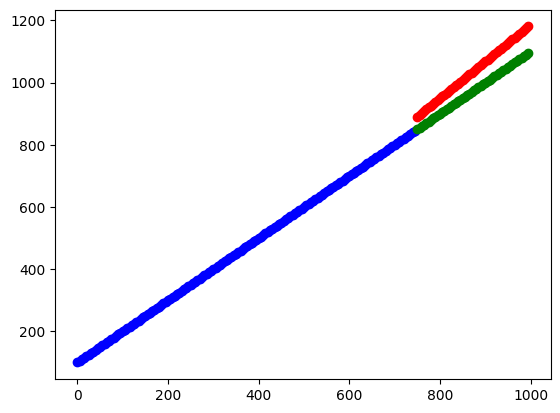

In [20]:
plt.scatter(x_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(x_reg_test,y_reg_test,c='g',label='Testing data')
plt.scatter(x_reg_test,y_reg_pred,c='r',)

In [21]:
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

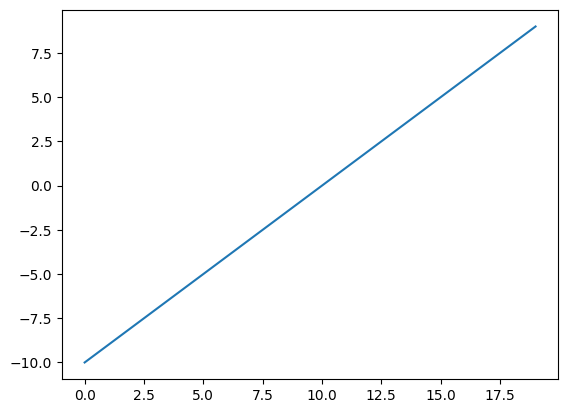

In [22]:
plt.plot(A)

In [23]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

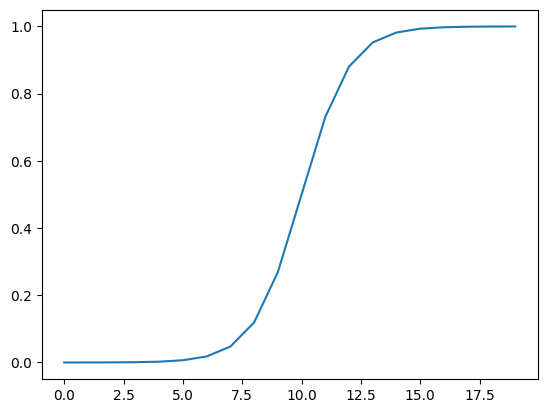

In [24]:
plt.plot(sigmoid(A))

In [25]:
def relu(x):
    return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

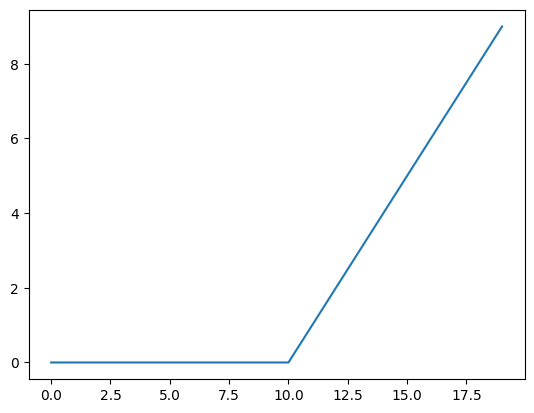

In [26]:
plt.plot(relu(A))

In [27]:
 len(x)

1000

In [28]:
# splitting the data

x_train,y_train=x[:800],y[:800]
x_test,y_test=x[800:],y[800:]
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [29]:
# creating model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=.01),
               metrics=['accuracy'])
history=model_4.fit(x_train,y_train,epochs=25)

Epoch 1/25


C:\Users\farde\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.4850
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5100
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5088
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5250
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5275
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5300
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5288
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5350
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5400
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5437
Epoch 11/25
25/25 [===========

In [30]:
model_4.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 0.9850


[0.10748720914125443, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


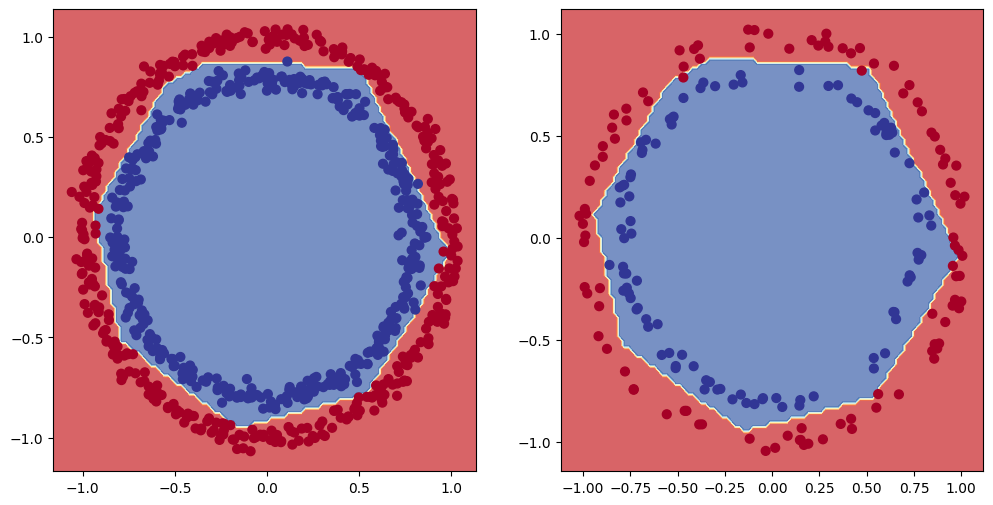

In [31]:
# plot decision boundary on train and test data

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_4,x_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_4,x_test,y_test)

## plot loss curve

In [32]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693450,0.48500
1,0.691132,0.51000
2,0.689583,0.50875
3,0.688179,0.52500
4,0.686539,0.52750
5,0.684475,0.53000
6,0.682367,0.52875
7,0.680310,0.53500
8,0.677676,0.54000
9,0.673544,0.54375


Text(0.5, 1.0, 'model_4_loss_curve')

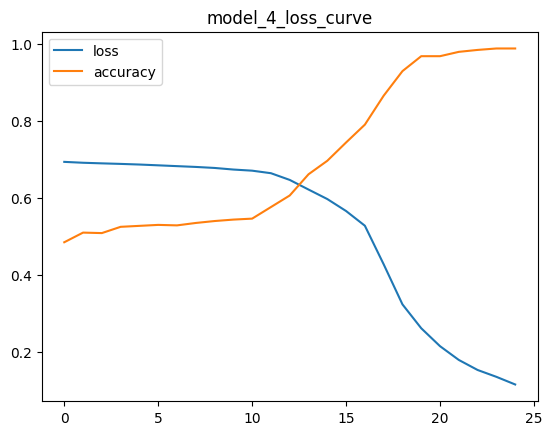

In [33]:
pd.DataFrame(history.history).plot()
plt.title('model_4_loss_curve')

In [34]:
# another model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_5.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])

#creating learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_5=model_5.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7092 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.4913 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7073 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1898 - accuracy: 0.9287 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.8288 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy: 0.6938 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7163 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5697 - accuracy: 0.6812 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7325 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.6100 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4863 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.5

<Axes: >

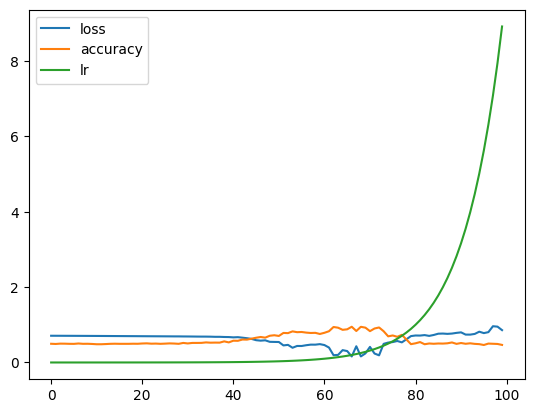

In [35]:
pd.DataFrame(history_5.history).plot()

Text(0.5, 1.0, 'learning rate vs loss')

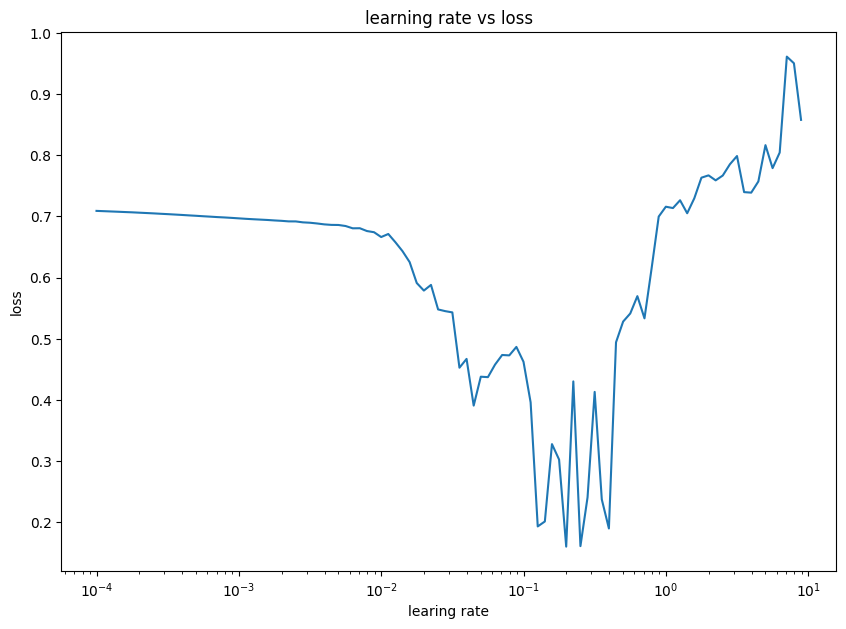

In [36]:
# plot lr vs loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_5.history['loss'])
plt.xlabel('learing rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [49]:
# another model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])
history_6=model_6.fit(x_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5238
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.5213
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.5462
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.5725
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.5888
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6572 - accuracy: 0.6363
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6477 - accuracy: 0.6538
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.7138
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6065 - accuracy: 0.7075
Epoch 11/20
25/25 [

In [50]:
model_6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9650


[0.22156542539596558, 0.9649999737739563]

In [39]:
model_4.evaluate(x_test,y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.1075 - accuracy: 0.9850


[0.10748720914125443, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


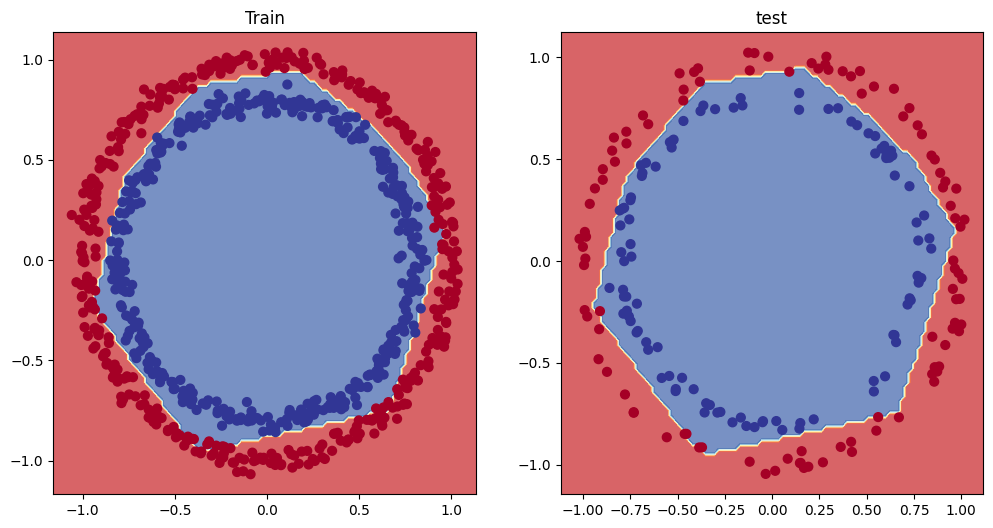

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_6,x_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_6,x_test,y_test)

In [57]:
loss,accuracy=model_6.evaluate(x_test,y_test)
print(f'model loss on the test set: {loss}')
print(f'model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.2216 - accuracy: 0.9650
model loss on the test set: 0.22156542539596558
model accuracy on the test set: 96.50%


In [58]:
from sklearn.metrics import confusion_matrix

y_preds=model_6.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [59]:
y_test[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [60]:
y_preds[:5]

array([[0.81548935],
       [0.86112034],
       [0.8012094 ],
       [0.81534535],
       [0.1944147 ]], dtype=float32)

In [61]:
tf.round(y_preds[:5])

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [62]:
confusion_matrix(y_test,tf.round(y_preds))

array([[94,  7],
       [ 0, 99]], dtype=int64)

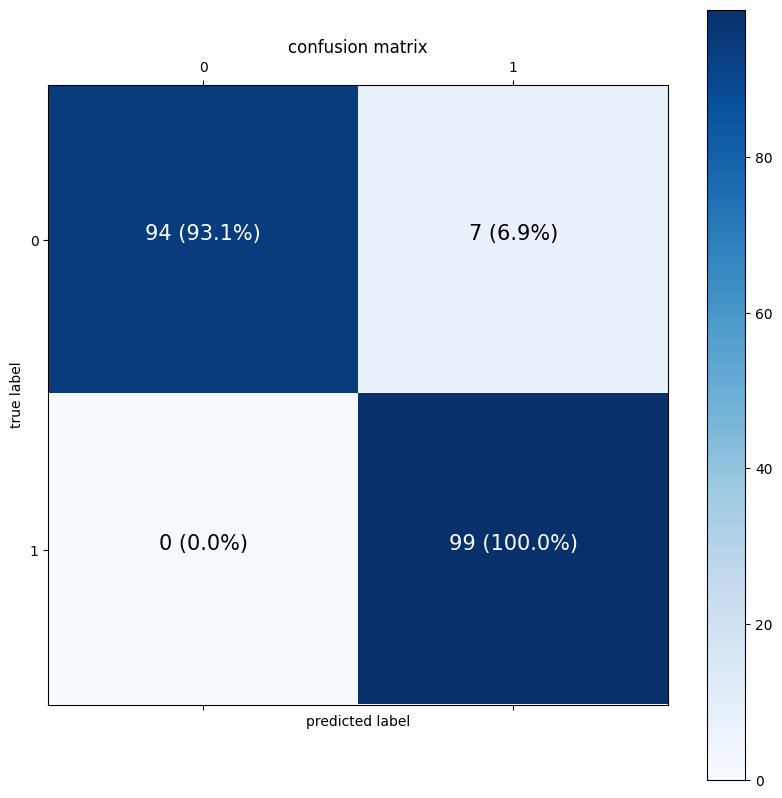

In [68]:
import itertools 

figsize=(10,10)

# creating confusion matrix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] # normalise the confusion matrix
n_classes=cm.shape[0]

# lets prettify it
fig,ax=plt.subplots(figsize=figsize)
# creating a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes=False

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])
    
# label the axes
ax.set(title='confusion matrix',
      xlabel='predicted label',
      ylabel='true label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# set thresold for diff. color
threshold=(cm.max()+cm.min())/2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white'if cm[i,j]>threshold else 'black',
            size=15)

In [70]:
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [71]:
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training labels:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [72]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

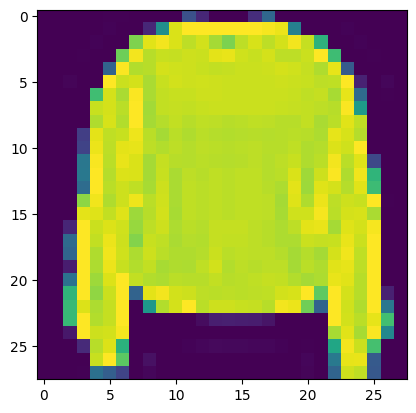

In [75]:
plt.imshow(train_data[7])

In [76]:
train_labels[7]

2

In [77]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_name)

10

Text(0.5, 1.0, 'Bag')

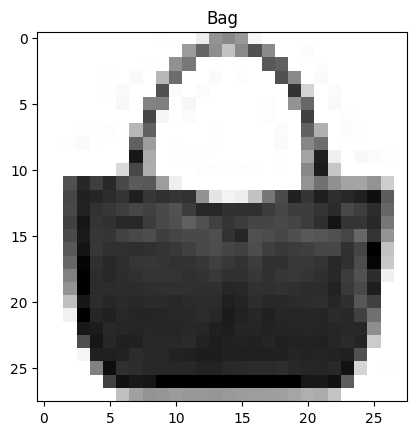

In [83]:
index_of_choice=100
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

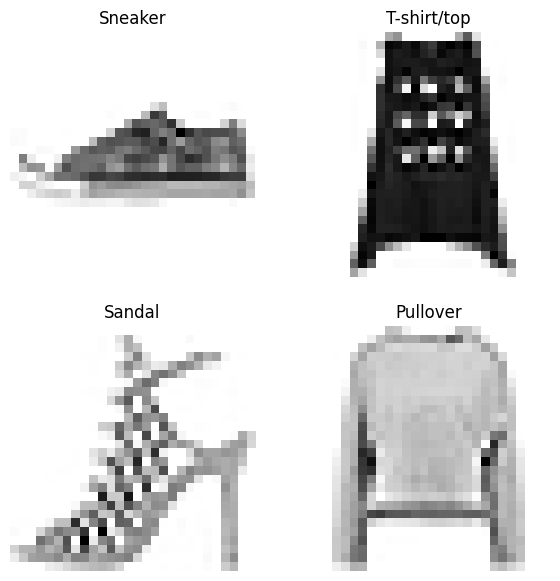

In [87]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

In [92]:
# building model

model_11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # convert it to (None,784(28*28))  
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
non_norm_history=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3136 - accuracy: 0.1008 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [94]:
model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [95]:
train_data.min(),train_data.max()

(0, 255)

In [96]:
# normalizing
train_data_norm=train_data/255.
test_data_norm=test_data/255.

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [97]:
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # convert it to (None,784(28*28))  
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
norm_history=model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2107 - accuracy: 0.4987 - val_loss: 0.9303 - val_accuracy: 0.6326
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8902 - accuracy: 0.6319 - val_loss: 0.8598 - val_accuracy: 0.6445
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8492 - accuracy: 0.6471 - val_loss: 0.8440 - val_accuracy: 0.6463
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8331 - accuracy: 0.6564 - val_loss: 0.8832 - val_accuracy: 0.6504
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8245 - accuracy: 0.6618 - val_loss: 0.8473 - val_accuracy: 0.6735
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8176 - accuracy: 0.6651 - val_loss: 0.8186 - val_accuracy: 0.6745
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8135 - accuracy: 0.6691 - val_loss: 0.8533 - val_accuracy:

<Axes: title={'center': 'normalised_data'}>

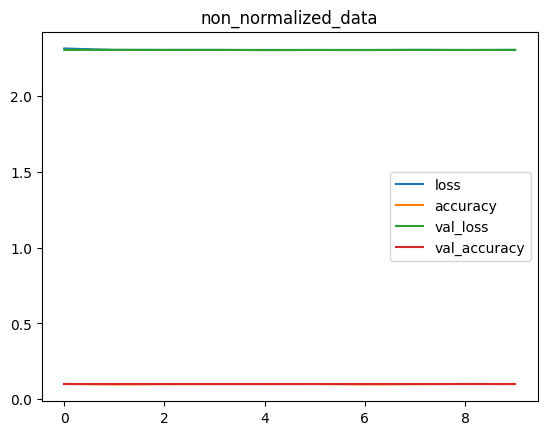

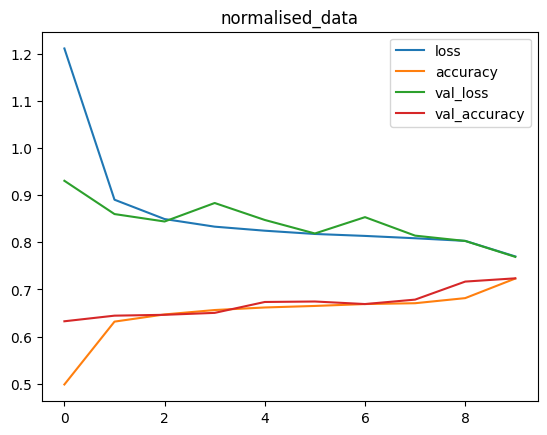

In [98]:
pd.DataFrame(non_norm_history.history).plot(title='non_normalized_data')
pd.DataFrame(norm_history.history).plot(title='normalised_data')

In [101]:
# creating model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

find_lr_history=model_13.fit(train_data_norm,
                          train_labels,
                          epochs=40,
                          validation_data=(test_data_norm,test_labels),
                          callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1062 - accuracy: 0.6369 - val_loss: 0.7957 - val_accuracy: 0.7149 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7059 - accuracy: 0.7491 - val_loss: 0.6809 - val_accuracy: 0.7709 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5964 - accuracy: 0.8003 - val_loss: 0.5965 - val_accuracy: 0.7961 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5557 - accuracy: 0.8126 - val_loss: 0.5733 - val_accuracy: 0.8036 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5386 - accuracy: 0.8166 - val_loss: 0.5779 - val_accuracy: 0.8049 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5272 - accuracy: 0.8193 - val_loss: 0.5558 - val_accuracy: 0.8097 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding ideal learning rate')

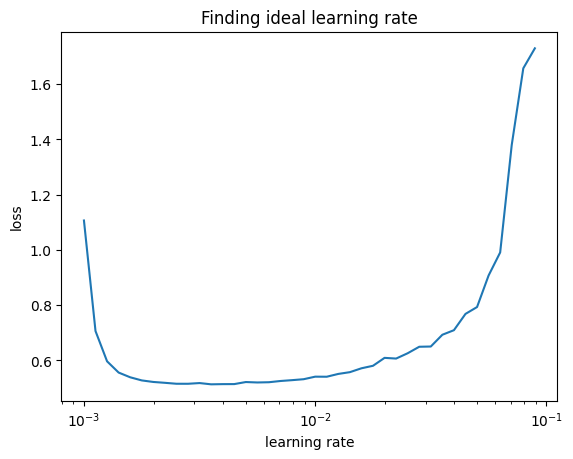

In [102]:
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Finding ideal learning rate')

In [103]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [104]:
model_14=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0622 - accuracy: 0.5653 - val_loss: 0.7501 - val_accuracy: 0.7187
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6836 - accuracy: 0.7502 - val_loss: 0.6765 - val_accuracy: 0.7600
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6236 - accuracy: 0.7791 - val_loss: 0.6412 - val_accuracy: 0.7789
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5959 - accuracy: 0.7931 - val_loss: 0.6193 - val_accuracy: 0.7884
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5822 - accuracy: 0.7961 - val_loss: 0.6150 - val_accuracy: 0.7851
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5728 - accuracy: 0.8001 - val_loss: 0.6181 - val_accuracy: 0.7851
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5679 - accuracy: 0.8016 - val_loss: 0.6412 - val_accuracy:

In [105]:
y_prob=model_14.predict(test_data_norm)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[3.75584390e-11, 1.03843405e-08, 4.74904491e-11, ...,
        1.22950859e-01, 1.97026719e-04, 5.61409473e-01],
       [1.80691504e-03, 2.23454877e-09, 8.97476435e-01, ...,
        0.00000000e+00, 1.86378270e-06, 0.00000000e+00],
       [5.18582999e-09, 9.99217749e-01, 1.71803617e-06, ...,
        5.40930442e-24, 2.70061057e-12, 4.04521197e-13],
       ...,
       [8.15715827e-03, 8.45215163e-06, 2.16324744e-03, ...,
        2.77237405e-07, 8.80314648e-01, 1.29598571e-11],
       [1.42559898e-07, 9.96058106e-01, 7.31963746e-06, ...,
        3.32997768e-18, 1.05006455e-11, 1.26886057e-08],
       [3.27279190e-06, 8.76332433e-06, 2.45179262e-06, ...,
        3.16093187e-03, 5.34543134e-02, 3.72743001e-04]], dtype=float32)

In [106]:
y_prob[0],tf.argmax(y_prob[0]),class_name[tf.argmax(y_prob[0])]

(array([3.75584390e-11, 1.03843405e-08, 4.74904491e-11, 8.88819920e-12,
        2.19830724e-07, 3.15442324e-01, 1.00137839e-07, 1.22950859e-01,
        1.97026719e-04, 5.61409473e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [107]:
y_preds=y_prob.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 6, 6, 5, 7], dtype=int64)

In [108]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

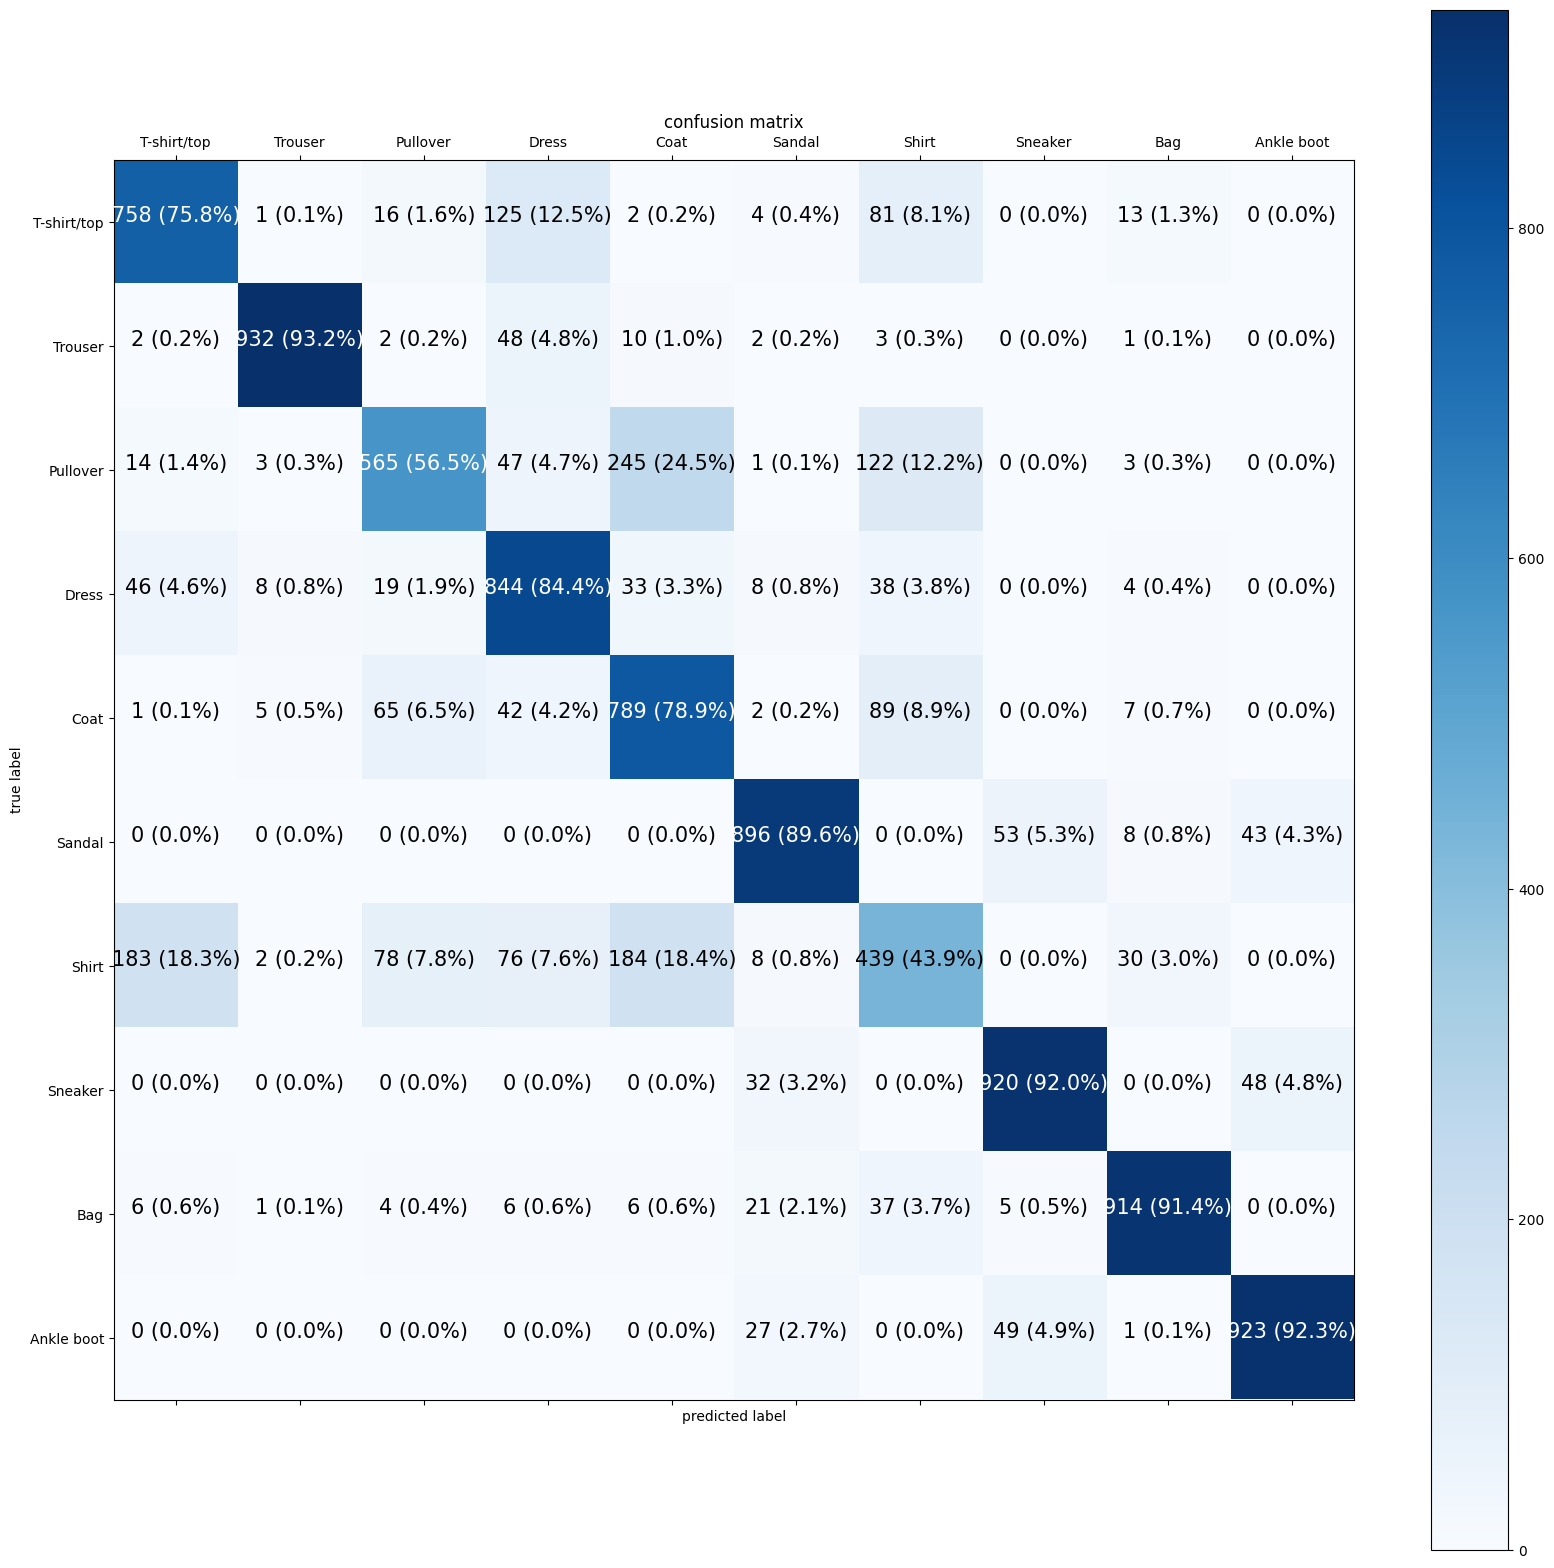

In [113]:
figsize=(20,20)

# creating confusion matrix
cm=confusion_matrix(test_labels,tf.round(y_preds))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] # normalise the confusion matrix
n_classes=cm.shape[0]

# lets prettify it
fig,ax=plt.subplots(figsize=figsize)
# creating a matrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes=class_name

if classes:
    labels=classes
else:
    labels=np.arange(cm.shape[0])
    
# label the axes
ax.set(title='confusion matrix',
      xlabel='predicted label',
      ylabel='true label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# set thresold for diff. color
threshold=(cm.max()+cm.min())/2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color='white'if cm[i,j]>threshold else 'black',
            size=15)

In [116]:
def plot_random_image(model,images,true_labels,classes):
    '''
    picks a random image,plots it and label it with a prediction and true label
    '''
    i=random.randint(0,len(images))
    
    target_image=images[i]
    pred_probs=model.predict(target_image.reshape(1,28,28))
    pred_label=classes[pred_probs.argmax()]
    true_label=classes[true_labels[i]]
    
    plt.imshow(target_image,cmap=plt.cm.binary)
    
    if pred_label==true_label:
        color='green'
    else:
        color='red'
        
    plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

1/1 [==============================] - 0s 32ms/step


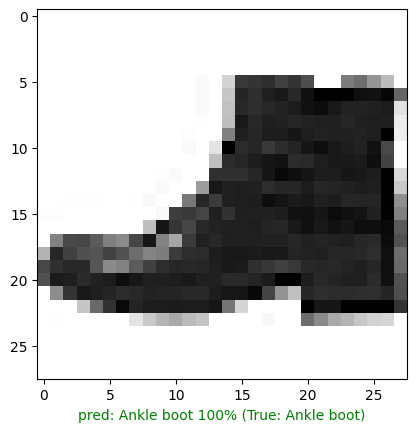

In [124]:
plot_random_image(model=model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_name)

In [126]:
model_14.layers

In [127]:
# get the pattern of a layer in our network
weight,biases=model_14.layers[1].get_weights()

weight,weight.shape

(array([[ 0.09791695, -0.43425795,  0.080772  ,  0.73845303],
        [ 1.0956405 , -0.5172408 ,  0.064151  , -0.3057336 ],
        [ 0.41751063, -0.9921536 , -0.01897587,  0.69526356],
        ...,
        [ 0.32743788, -0.4875661 , -0.01367126,  0.3242052 ],
        [ 0.6520891 , -0.19977374, -0.04668057,  0.06824134],
        [ 0.23971888, -0.5489461 ,  0.05044201,  0.4358079 ]],
       dtype=float32),
 (784, 4))

In [128]:
biases,biases.shape

(array([ 0.04091738,  1.1047258 , -0.01288928,  1.0586212 ], dtype=float32),
 (4,))

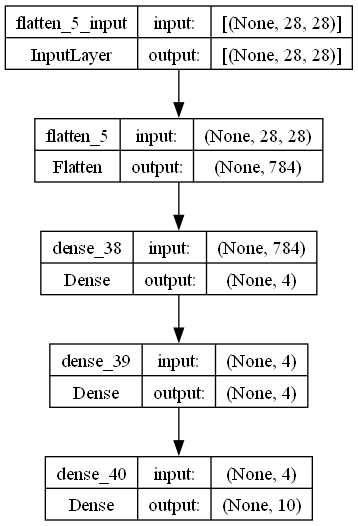

In [130]:
from tensorflow.keras.utils import plot_model

plot_model(model_14,show_shapes=True)